# 0603 I02 Data Wrangling and Plotting - Bin Liao

## 1. Description:

**Objective**: The purpose of this assignment is to exercise and assess my skills in data wrangling and visualization using Python.<p/>

The assignment involves working with two datasets provided by Owlex, a leading credit card provider. The company has recently experienced an increase in credit loss, and as a data analyst, I am tasked to prepare the data for analysis to aid in their understanding of this issue.<p/>

The two datasets are demo.csv, which includes demographic information about the credit card applicants, and credit.csv, which provides their credit history information.<p/>

**Tasks**: The assignment is divided into five main tasks:


1. Create a new Jupyter notebook and name it appropriately.
2. Check for and report any duplicate records in each of the datasets.
3. Create a master dataframe by joining both datasets on Application ID, and justify the join type used.
4. Identify any variables with missing values in the master dataframe, and report these variables and the number of missing values.
5. Create four suitable visualizations on the master dataframe to share insights about the data.


## 2. Understand the data
### 2a. Load the data

In [22]:
import pandas as pd
import numpy as np
import os as os

def download_and_load_data(file_name, url):
    data_dir = 'data'
    file_path = os.path.join(data_dir, file_name)

    # Check if the data file exists
    if not os.path.isfile(file_path):
        # If not, check if the data directory exists
        if not os.path.isdir(data_dir):
            # If not, create the data directory
            os.makedirs(data_dir)
        
        # Download the data file
        print(f'Downloading file from {url} ...')
        !wget -O {file_path} {url}
        print(f'File downloaded and saved to {file_path}')

    # Load data into a dataframe.
    df = pd.read_csv(file_path)
    return df

# Use the function to download and load the data
demo = download_and_load_data('demo.csv', 'https://raw.githubusercontent.com/dearbharat/datacleaning/main/demo.csv')
credit = download_and_load_data('credit.csv', 'https://raw.githubusercontent.com/dearbharat/datacleaning/main/credit.csv')

# List the first few rows of the dataframes
print("Demo data:")
demo.head()

Demo data:


,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [23]:
print("Credit data:")
credit.head()

Credit data:


,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


### 2b. Handle the duplicated function.

To check for duplicate records in the **demo.csv** dataset, we can use the following code:


In [24]:
#Checking for duplicate data in demo

# Checking for duplicate row:
print("Checking for duplicate row in demo dataframe:")
demo_duplicate_row = demo.duplicated()
demo_duplicate_row_count = demo_duplicate_row.sum()

if demo_duplicate_row_count > 0:
  print(f"There are {demo_duplicate_row_count} duplicate rows in demo.csv.")
  demo_duplicate_rows_indices = demo[demo_duplicate_row].index
  demo_duplicate_rows_data = demo.loc[demo_duplicate_rows_indices]
  print("Duplicate rows in demo:")
  print(demo_duplicate_rows_data)
else:
  print("No duplicate row found in the demo.csv.")



Checking for duplicate row in demo dataframe:
No duplicate row found in the demo.csv.


In [25]:
# Check the duplicate recode across all columns in the demo dataframe.
print("Checking for duplicate records across all columns in demo.csv.")

demo_duplicate_records = demo.duplicated(keep=False)
demo_duplicate_records_count = demo_duplicate_records.sum()

if demo_duplicate_records_count > 0:
    print(f"There are {demo_duplicate_records_count} duplicate records in demo.csv.")
    duplicate_records_indices = demo[demo_duplicate_records].index
    duplicate_records_data = demo.loc[duplicate_records_indices]
    print("Duplicate records in demo:")
    print(duplicate_records_data)
else:
    print("No duplicate records found in the demo.csv.")


Checking for duplicate records across all columns in demo.csv.
No duplicate records found in the demo.csv.


From the analysis result, there are **no** duplicate records in the **demo.csv** dataset.

We then applied the same code to check the duplicated records in **credit.csv**.

In [26]:
#Checking for duplicate data in credit

# Checking for duplicate row:
print("Checking for duplicate row in credit dataframe:")
credit_duplicate_row = credit.duplicated()
credit_duplicate_row_count = credit_duplicate_row.sum()

if credit_duplicate_row_count > 0:
  print("There are {credit_duplicate_row_count} duplicate rows in credit.csv.")
  credit_duplicate_rows_indices = credit[credit_duplicate_row].index
  credit_duplicate_rows_data = credit.loc[credit_duplicate_rows_indices]
  print("Duplicate rows in credit:")
  print(credit_duplicate_rows_data)
else:
  print("No duplicate row found in the credit.csv.")



Checking for duplicate row in credit dataframe:
No duplicate row found in the credit.csv.


In [27]:
# Check the duplicate recode across all columns in the credit dataframe.
print("Checking for duplicate records across all columns in credit.csv.")

credit_duplicate_records = credit.duplicated(keep=False)
credit_duplicate_records_count = credit_duplicate_records.sum()

if credit_duplicate_records_count > 0:
    print("There are {credit_duplicate_records_count} duplicate records in credit.csv.")
    duplicate_records_indices = credit[credit_duplicate_records].index
    duplicate_records_data = credit.loc[duplicate_records_indices]
    print("Duplicate records in credit:")
    print(duplicate_records_data)
else:
    print("No duplicate records found in the credit.csv.")


Checking for duplicate records across all columns in credit.csv.
No duplicate records found in the credit.csv.


From the analysis, there are also no duplicate result in the credit.csv.




## 3. Merge the demo.csv and credit.csv to a master data set
### 3a: Identify the data


In [28]:
# Check the dataype in the demo dataset.
demo.dtypes

Application ID                                   int64
Age                                              int64
Gender                                          object
Marital Status (at the time of application)     object
No of dependents                               float64
Income                                         float64
Education                                       object
Profession                                      object
Type of residence                               object
No of months in current residence                int64
No of months in current company                  int64
Performance Tag                                float64
dtype: object

In [29]:
# Check the base static description in demo dataset
demo.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [30]:
# Check the null values in the demo dataset.
demo.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [31]:
# Check the size of demo dataset
demo.shape

(71295, 12)

In [32]:
# Check the datatypes in the credit dataset
credit.dtypes

Application ID                                                       int64
No of times 90 DPD or worse in last 6 months                         int64
No of times 60 DPD or worse in last 6 months                         int64
No of times 30 DPD or worse in last 6 months                         int64
No of times 90 DPD or worse in last 12 months                        int64
No of times 60 DPD or worse in last 12 months                        int64
No of times 30 DPD or worse in last 12 months                        int64
Avgas CC Utilization in last 12 months                             float64
No of trades opened in last 6 months                               float64
No of trades opened in last 12 months                                int64
No of PL trades opened in last 6 months                              int64
No of PL trades opened in last 12 months                             int64
No of Inquiries in last 6 months (excluding home & auto loans)       int64
No of Inquiries in last 1

In [33]:
# Check the base statis info in the credit dataset
credit.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [34]:
# Check the null values in the credit dataset.
credit.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [35]:
# Check the credit dataset's size.
credit.shape

(71295, 19)

### 3b. Merge the demo and credit to form a master dataset.
Based on the data informaiton in the demo and credit dataset, both dataset contain a "Performance Tag" column, and they all contain missing value on this tag.  In this case, **inner** john will be more appropriate to merge these two dataset. 

In [36]:
# Merge the data with inner_join
master_df = pd.merge(demo, credit, on='Application ID', how='inner')

# Print out the first few rows of the master dataset.
master_df.head(10)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0
5,312196805,20,M,Married,1.0,39.0,Bachelor,SAL,NaN,116,...,0,0,0,0,0,0.0,2569.0,1,0,0.0
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,...,1,0,0,0,0,1.0,3005535.0,4,0,0.0
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,...,1,0,0,0,0,1.0,3004790.0,3,0,0.0
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,...,0,0,0,0,0,1.0,3007428.0,2,0,0.0
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,...,1,0,0,0,0,0.0,170860.0,1,1,0.0


In [37]:
# Check the size of the master dataset
master_df.shape

(71301, 30)

In [38]:
# Check the columns
master_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag_x', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto lo

In [39]:
# Check the summary statistics of the DataFrame
master_df.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
count,7.130100e+04,71301.000000,71298.000000,71301.000000,71301.000000,71301.000000,69876.000000,71301.000000,71301.000000,71301.000000,...,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,71029.000000,7.102900e+04,71301.000000,71301.000000,69876.000000
mean,4.989767e+08,44.942694,2.865256,27.194450,34.564985,33.958780,0.042203,0.270319,0.430555,0.577243,...,5.826721,1.206841,2.397414,1.763510,3.535210,0.256402,1.249092e+06,8.186379,0.084627,0.042203
std,2.885844e+08,9.939530,1.382308,15.514663,36.760727,20.411457,0.201054,0.534161,0.825330,1.074450,...,5.064964,1.352902,2.420039,1.971232,3.582094,0.436650,1.278846e+06,7.090555,0.278328,0.201054
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483824e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115220e+05,3.000000,0.000000,0.000000
50%,4.975977e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749850e+05,6.000000,0.000000,0.000000
75%,7.496040e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000,0.000000,1.000000,1.000000,...,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920753e+06,10.000000,0.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000,3.000000,5.000000,7.000000,...,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [40]:
# Check the master set datatype
master_df.dtypes

Application ID                                                       int64
Age                                                                  int64
Gender                                                              object
Marital Status (at the time of application)                         object
No of dependents                                                   float64
Income                                                             float64
Education                                                           object
Profession                                                          object
Type of residence                                                   object
No of months in current residence                                    int64
No of months in current company                                      int64
Performance Tag_x                                                  float64
No of times 90 DPD or worse in last 6 months                         int64
No of times 60 DPD or wor

## 4. Verify the missing values in the master dataset


In [41]:
missing_values = master_df.isnull().sum()
print(missing_values)

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           119
Profession                                                           14
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_x                                                  1425
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

Based on the output from master_df.isnull().sum(), we find that there are several variables in the master_df DataFrame with missing values. The variables and their respective counts of missing values are as follows:

- Gender: 2 missing values
- Marital Status (at the time of application): 6 missing values
- No of dependents: 3 missing values
- Education: 119 missing values
- Profession: 14 missing values
- Type of residence: 8 missing values
-Performance Tag_x: 1425 missing values
- Avgas CC Utilization in last 12 months: 1058 missing values
- No of trades opened in last 6 months: 1 missing value
- Presence of open home loan: 272 missing values
- Outstanding Balance: 272 missing values
- Performance Tag_y: 1425 missing values

## 5. Visualiazation 

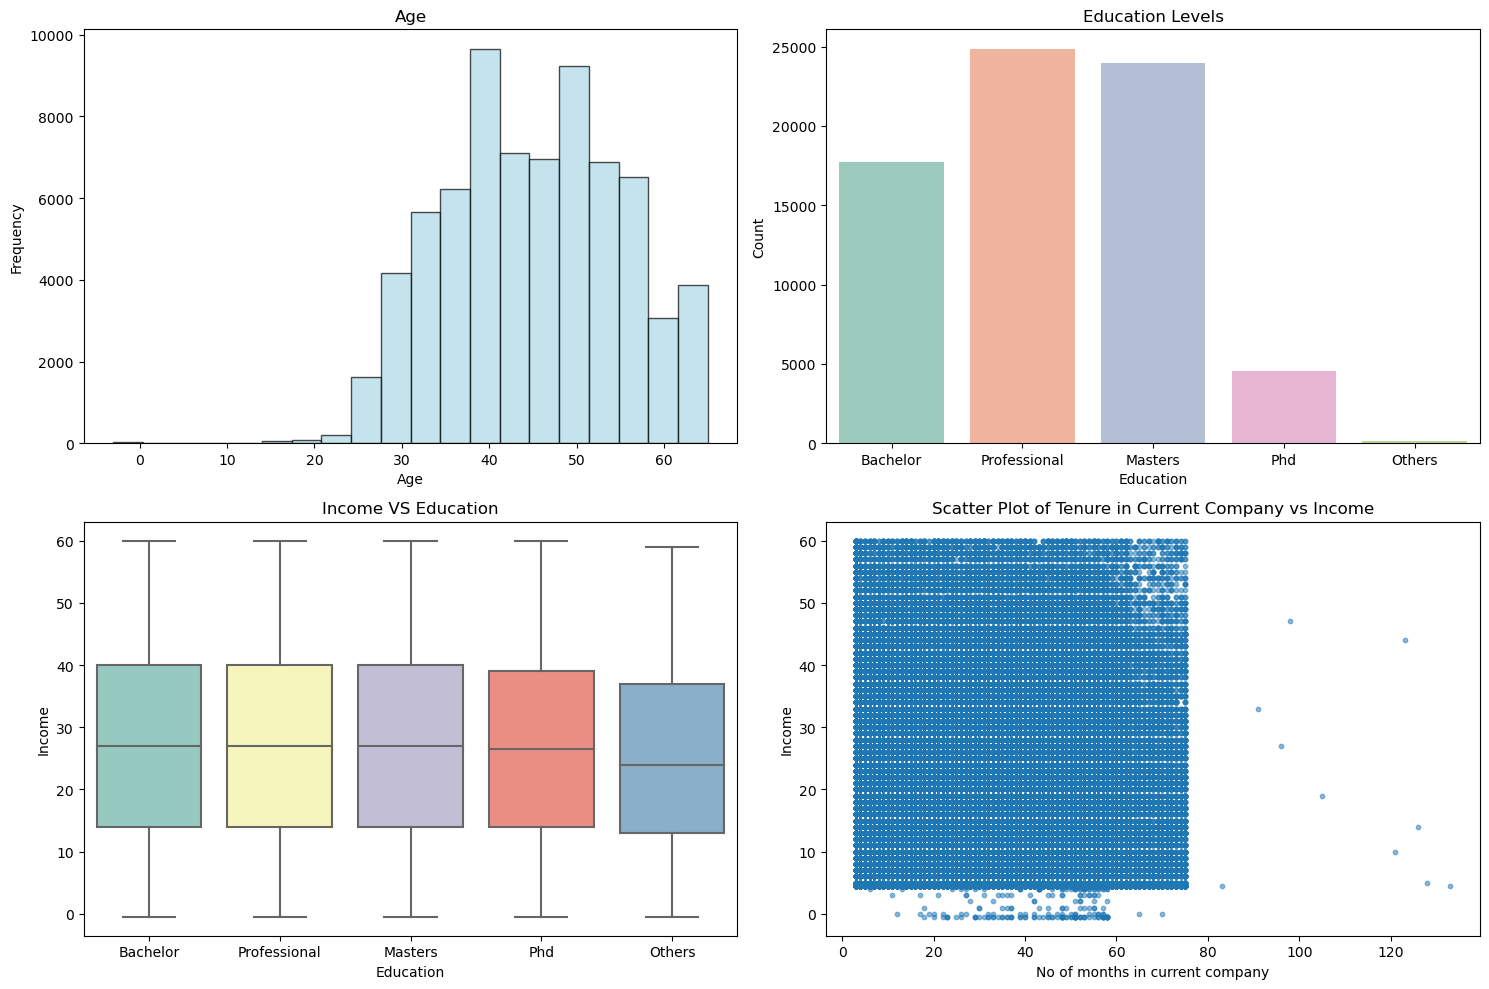

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of Age
axs[0, 0].hist(master_df['Age'], bins=20, color='lightblue', alpha=0.7, edgecolor='black')
axs[0, 0].set_title('Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

# Bar Plot of Education
sns.countplot(data=master_df, x='Education', ax=axs[0, 1], alpha=0.7, palette="Set2")
axs[0, 1].set_title('Education Levels')
axs[0, 1].set_xlabel('Education')
axs[0, 1].set_ylabel('Count')

# Box Plot of Income by Education
sns.boxplot(data=master_df, x='Education', y='Income', ax=axs[1, 0], palette="Set3")
axs[1, 0].set_title('Income VS Education')
axs[1, 0].set_xlabel('Education')
axs[1, 0].set_ylabel('Income')

# Scatter Plot of No of months in current company vs Income
axs[1, 1].scatter(master_df['No of months in current company'], master_df['Income'], s=10, alpha=0.5)
axs[1, 1].set_title('Scatter Plot of Tenure in Current Company vs Income')
axs[1, 1].set_xlabel('No of months in current company')
axs[1, 1].set_ylabel('Income')


plt.tight_layout()
plt.show()